In [2]:
import numpy as np
# import pandas as pd
# import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import binom, beta, uniform
from scipy.special import gamma

In [3]:
sumY = 57
n = 100

### b) fixed theta

In [4]:
theta0 = np.arange(0,1.1,0.1)
y0 = np.array([binom.pmf(k=sumY, n=n, p=i) for i in theta0])

### c) no prior informaton about theta

In [5]:
theta1 = np.arange(0,1.1,0.1)
py_inv = gamma(n+2)/(gamma(sumY+1)*gamma(n-sumY+1))
y1 = np.array([(i**sumY)*((1-i)**(n-sumY))* py_inv/len(theta1) for i in theta1])

### d) uniform theta

In [6]:
theta2 = np.arange(0,1.1,0.1)
y2 = np.array([binom.pmf(k=sumY, n=n, p=i)*uniform.pdf(i) for i in theta2])

### e) posterior theta is beta(1+57,1+100-57)

In [7]:
theta3 = np.arange(0,1.1,0.1)
y3 = np.array([beta.pdf(x=i, a=sumY+1, b=n-sumY+1)/len(theta3) for i in theta3])

### Final plot

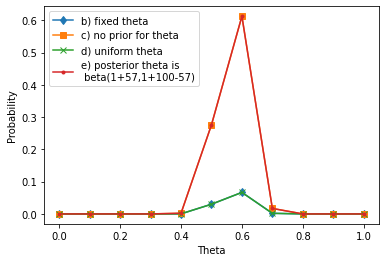

In [11]:
plt.figure(figsize = (6,4))
# plt.suptitle('Probability of sum(Y)=57 given theta')
plt.plot(theta0, y0, 'd-', label = 'b) fixed theta')
plt.plot(theta1, y1, 's-', label = 'c) no prior for theta')
plt.plot(theta2, y2, 'x-', label = 'd) uniform theta')
plt.plot(theta3, y3, '.-', label = 'e) posterior theta is \n beta(1+57,1+100-57)')
plt.xlabel('Theta')
plt.ylabel('Probability')
plt.legend()
plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex1_3_Fig1.png')